# Exploration

This first notebook will be exploring and identifying that the'Real' dataset does not have any inconsistencies regarding to voice auhtors.

In [12]:
import os
import sys
import pandas as pd
import soundfile as sf
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import random
import shutil

In [2]:
base_path = 'Latin_America_Spanish_anti_spoofing_dataset/FinalDataset_16khz/Real'


In [3]:

inconsistencies = []
gender_distribution = {'male': 0, 'female': 0, 'unknown': 0}
speaker_ids = set()

In [4]:


print("--- Starting comprehensive dataset integrity and distribution check ---")

if not os.path.isdir(base_path):
    print(f"\nERROR: The path '{base_path}' does not exist or is not a directory.")
    print("Please adjust the 'base_path' variable in the script.")
    sys.exit(1)

for country_name in os.listdir(base_path):
    country_path = os.path.join(base_path, country_name)
    if os.path.isdir(country_path):
        country_code_from_folder = ''
        if country_name.lower() == 'chile':
            country_code_from_folder = 'cl'
        else:
            country_code_from_folder = country_name[:2].lower()
        
        for speaker_id_from_folder in os.listdir(country_path):
            speaker_path = os.path.join(country_path, speaker_id_from_folder)
            if os.path.isdir(speaker_path):
                if speaker_id_from_folder not in speaker_ids:
                    speaker_ids.add(speaker_id_from_folder)
                    if len(speaker_id_from_folder) > 2:
                        gender_char = speaker_id_from_folder[2].lower()
                        if gender_char == 'm':
                            gender_distribution['male'] += 1
                        elif gender_char == 'f':
                            gender_distribution['female'] += 1
                        else:
                            gender_distribution['unknown'] += 1
                    else:
                        gender_distribution['unknown'] += 1

                speaker_code_from_id = speaker_id_from_folder[:2].lower()

                if country_code_from_folder != speaker_code_from_id:
                    inconsistency_info = {
                        "path": speaker_path,
                        "type": "Country Mismatch",
                        "error": f"Folder '{country_name}' (code '{country_code_from_folder}') contains speaker '{speaker_id_from_folder}' (code '{speaker_code_from_id}')"
                    }
                    inconsistencies.append(inconsistency_info)
                    continue

                for filename in os.listdir(speaker_path):
                    if filename.endswith('.wav'):
                        try:
                            parts = filename.split('_')
                            speaker_id_from_filename = f"{parts[0]}_{parts[1]}"
                        except IndexError:
                            inconsistency_info = {
                                "path": os.path.join(speaker_path, filename),
                                "type": "File Format Error",
                                "error": "Filename does not contain expected '_' separators to extract ID."
                            }
                            inconsistencies.append(inconsistency_info)
                            continue

                        if speaker_id_from_folder != speaker_id_from_filename:
                            inconsistency_info = {
                                "path": os.path.join(speaker_path, filename),
                                "type": "File Mismatch",
                                "error": f"Folder ID '{speaker_id_from_folder}' does not match file ID '{speaker_id_from_filename}'."
                            }
                            inconsistencies.append(inconsistency_info)

total_speakers = len(speaker_ids)
total_audio_files = sum([len(files) for r, d, files in os.walk(base_path) if any(f.endswith('.wav') for f in files)])



--- Starting comprehensive dataset integrity and distribution check ---


In [5]:
print("\n--- Integrity Report ---")
print(f"Analyzed path: {os.path.abspath(base_path)}")
print(f"Unique speaker folders found: {total_speakers}")

if not inconsistencies:
    print("\nSUCCESS: No integrity inconsistencies were found.")
else:
    print(f"\nATTENTION: Found {len(inconsistencies)} integrity inconsistencies:")
    for item in inconsistencies:
        print(f"  - Path: {item['path']}")
        print(f"    Type: {item['type']}")
        print(f"    Error: {item['error']}")

print("\n--- Distribution Report ---")
print("Speaker Gender Distribution:")
print(f"  - Male speakers:   {gender_distribution['male']}")
print(f"  - Female speakers: {gender_distribution['female']}")
if gender_distribution['unknown'] > 0:
    print(f"  - Unknown gender:  {gender_distribution['unknown']}")
print(f"  - Total speakers:  {total_speakers}")


--- Integrity Report ---
Analyzed path: c:\Users\ASUS\Desktop\Andes\Maestria\ANTI-SPOOF\Latin_America_Spanish_anti_spoofing_dataset\FinalDataset_16khz\Real
Unique speaker folders found: 162

SUCCESS: No integrity inconsistencies were found.

--- Distribution Report ---
Speaker Gender Distribution:
  - Male speakers:   78
  - Female speakers: 84
  - Total speakers:  162


Knowing that we have 162 different speakers, we will need to create 162 different voice cloners to copy their characteristics. Let's continue with the dataset exploring.

In [6]:

speaker_data = []

if not os.path.isdir(base_path):
    print(f"ERROR: La ruta '{base_path}' no existe.")
else:
    for country_name in sorted(os.listdir(base_path)):
        country_path = os.path.join(base_path, country_name)
        if os.path.isdir(country_path):
            for speaker_id in os.listdir(country_path):
                speaker_path = os.path.join(country_path, speaker_id)
                if os.path.isdir(speaker_path):
                    gender = 'Unknown'
                    if len(speaker_id) > 2:
                        gender_char = speaker_id[2].lower()
                        if gender_char == 'm':
                            gender = 'Male'
                        elif gender_char == 'f':
                            gender = 'Female'
                    
                    speaker_data.append({
                        'country': country_name,
                        'gender': gender,
                        'speaker_id': speaker_id
                    })

df = pd.DataFrame(speaker_data)

--- Analyzing dataset for visualization ---

--- Speaker counts per country and gender ---
gender     Female  Male
country                
Argentina      30    12
Chile          12    17
Colombia       14    17
Peru           18    20
Venezuela      10    12

--- Displaying Plot ---


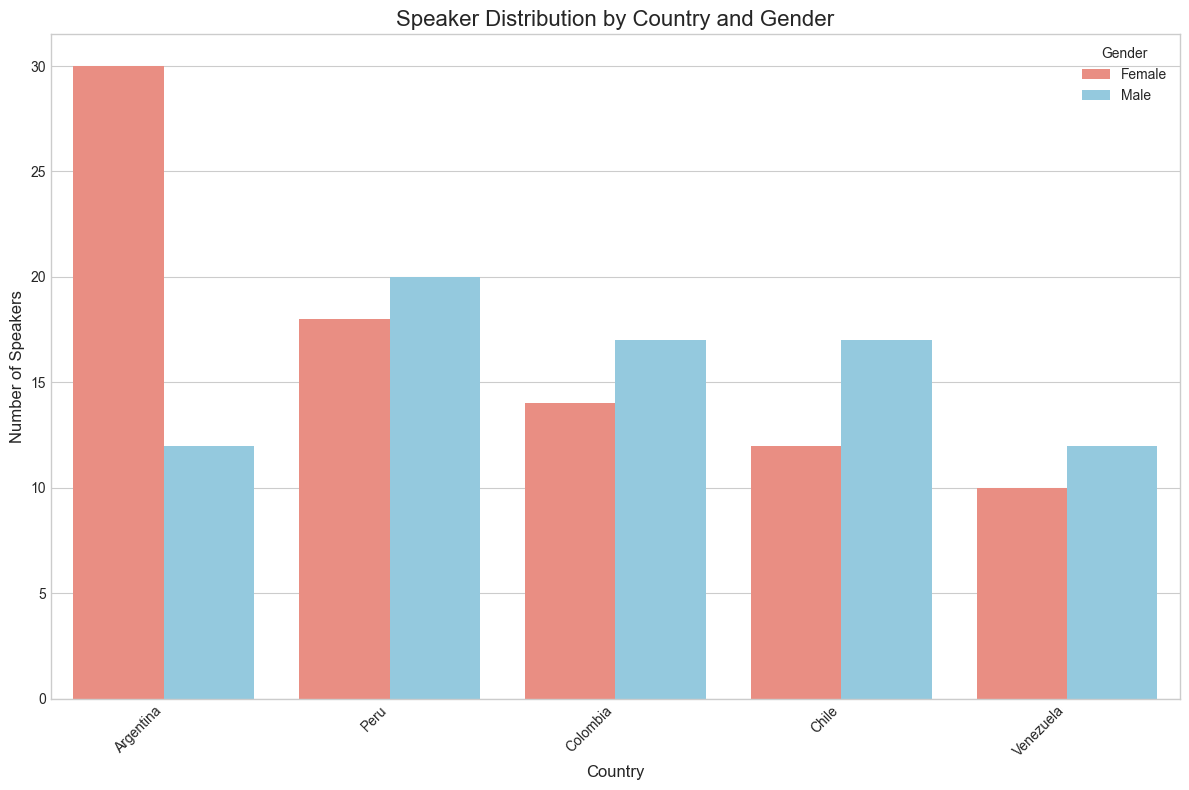

In [7]:
def display_distribution_plot(base_path=base_path):
    speaker_data = []

    print("--- Analyzing dataset for visualization ---")

    if not os.path.isdir(base_path):
        print(f"ERROR: The path '{base_path}' does not exist or is not a directory.")
        return

    for country_name in sorted(os.listdir(base_path)):
        country_path = os.path.join(base_path, country_name)
        if os.path.isdir(country_path):
            for speaker_id in os.listdir(country_path):
                speaker_path = os.path.join(country_path, speaker_id)
                if os.path.isdir(speaker_path):
                    gender = 'Unknown'
                    if len(speaker_id) > 2:
                        gender_char = speaker_id[2].lower()
                        if gender_char == 'm':
                            gender = 'Male'
                        elif gender_char == 'f':
                            gender = 'Female'
                    
                    speaker_data.append({
                        'country': country_name,
                        'gender': gender,
                        'speaker_id': speaker_id
                    })

    if not speaker_data:
        print("No speaker data was found to generate a plot.")
        return

    df = pd.DataFrame(speaker_data)

    print("\n--- Speaker counts per country and gender ---")
    counts = df.groupby(['country', 'gender']).size().unstack(fill_value=0)
    print(counts)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))
    
    sns.countplot(
        x='country',
        hue='gender',
        data=df,
        order=df['country'].value_counts().index,
        palette={'Male': 'skyblue', 'Female': 'salmon', 'Unknown': 'lightgray'}
    )
    
    plt.title('Speaker Distribution by Country and Gender', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Number of Speakers', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Gender')
    plt.tight_layout()
    
    print("\n--- Displaying Plot ---")
    plt.show()


display_distribution_plot()

--- Starting analysis of audio file properties ---

--- Technical Properties Summary ---

Sample Rate Distribution:
16000    22816
Name: sample_rate, dtype: int64

Channel Distribution:
1    22816
Name: channels, dtype: int64

--- Duration Analysis per Speaker (in seconds) ---
count     162.000000
mean      790.205889
std       185.356848
min       105.471688
25%       678.290531
50%       783.741469
75%       905.725047
max      1296.040250
Name: duration_sec, dtype: float64

--- Displaying duration distribution plot ---


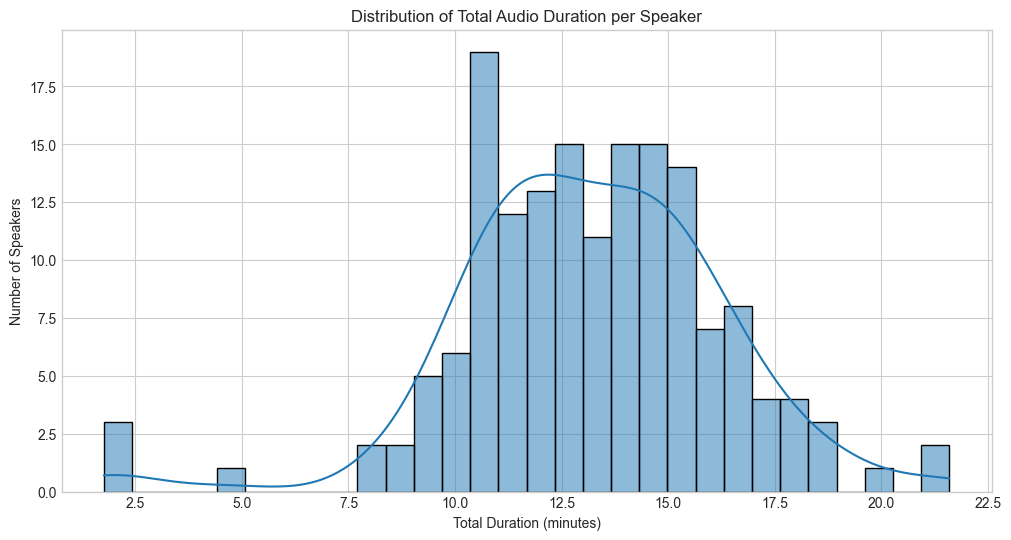

In [8]:
def analyze_audio_properties(base_path=base_path):
    audio_data = []
    print("--- Starting analysis of audio file properties ---")

    if not os.path.isdir(base_path):
        print(f"ERROR: The path '{base_path}' does not exist.")
        return

    for country_name in sorted(os.listdir(base_path)):
        country_path = os.path.join(base_path, country_name)
        if not os.path.isdir(country_path): continue
        
        for speaker_id in os.listdir(country_path):
            speaker_path = os.path.join(country_path, speaker_id)
            if not os.path.isdir(speaker_path): continue
            
            for filename in os.listdir(speaker_path):
                if filename.endswith('.wav'):
                    file_path = os.path.join(speaker_path, filename)
                    try:
                        info = sf.info(file_path)
                        audio_data.append({
                            'speaker_id': speaker_id,
                            'country': country_name,
                            'duration_sec': info.duration,
                            'sample_rate': info.samplerate,
                            'channels': info.channels
                        })
                    except Exception as e:
                        print(f"Could not process file {file_path}: {e}")

    if not audio_data:
        print("No audio data was found.")
        return
    
    df = pd.DataFrame(audio_data)
    
    print("\n--- Technical Properties Summary ---")
    print("\nSample Rate Distribution:")
    print(df['sample_rate'].value_counts())
    
    print("\nChannel Distribution:")
    print(df['channels'].value_counts())

    speaker_duration = df.groupby('speaker_id')['duration_sec'].sum()

    print("\n--- Duration Analysis per Speaker (in seconds) ---")
    print(speaker_duration.describe())
    
    plt.figure(figsize=(12, 6))
    sns.histplot(speaker_duration / 60, bins=30, kde=True)
    plt.title('Distribution of Total Audio Duration per Speaker')
    plt.xlabel('Total Duration (minutes)')
    plt.ylabel('Number of Speakers')
    plt.grid(True)
    print("\n--- Displaying duration distribution plot ---")
    plt.show()

analyze_audio_properties()

--- Analyzing audio files for duration comparison plots ---

--- Displaying Plots ---


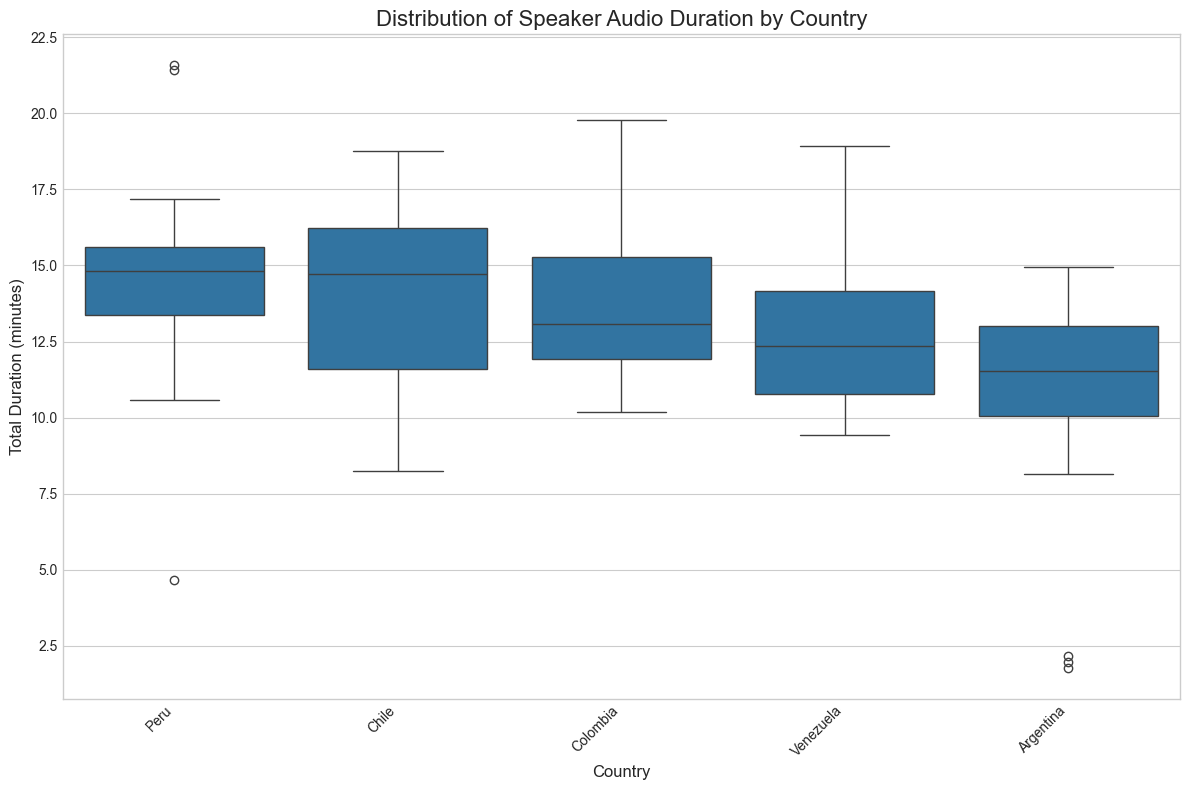

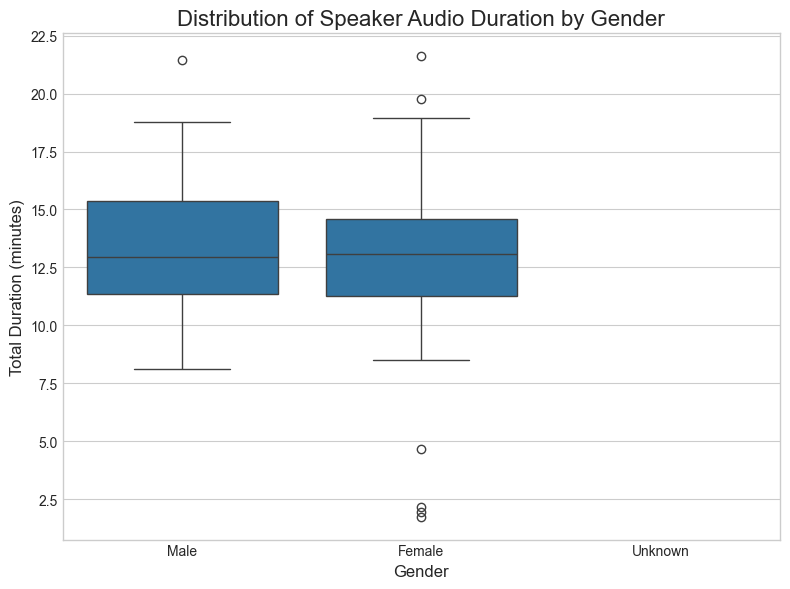

In [9]:


def display_duration_comparison_plots(base_path=base_path):
    audio_data = []
    print("--- Analyzing audio files for duration comparison plots ---")

    if not os.path.isdir(base_path):
        print(f"ERROR: The path '{base_path}' does not exist.")
        return

    for country_name in sorted(os.listdir(base_path)):
        country_path = os.path.join(base_path, country_name)
        if not os.path.isdir(country_path): continue
        
        for speaker_id in os.listdir(country_path):
            speaker_path = os.path.join(country_path, speaker_id)
            if not os.path.isdir(speaker_path): continue
            
            for filename in os.listdir(speaker_path):
                if filename.endswith('.wav'):
                    file_path = os.path.join(speaker_path, filename)
                    try:
                        info = sf.info(file_path)
                        gender = 'Unknown'
                        if len(speaker_id) > 2:
                            gender_char = speaker_id[2].lower()
                            if gender_char == 'm': gender = 'Male'
                            elif gender_char == 'f': gender = 'Female'
                        
                        audio_data.append({
                            'speaker_id': speaker_id,
                            'country': country_name,
                            'gender': gender,
                            'duration_sec': info.duration
                        })
                    except Exception as e:
                        print(f"Could not process file {file_path}: {e}")

    if not audio_data:
        print("No audio data was found.")
        return
    
    df = pd.DataFrame(audio_data)
    speaker_duration_df = df.groupby(['speaker_id', 'country', 'gender'])['duration_sec'].sum().reset_index()
    speaker_duration_df['duration_min'] = speaker_duration_df['duration_sec'] / 60

    print("\n--- Displaying Plots ---")
    
    # Plot 1: Duration by Country
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='country', y='duration_min', data=speaker_duration_df, 
                order=speaker_duration_df.groupby('country')['duration_min'].median().sort_values(ascending=False).index)
    plt.title('Distribution of Speaker Audio Duration by Country', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Total Duration (minutes)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Duration by Gender
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='gender', y='duration_min', data=speaker_duration_df,
                order=['Male', 'Female', 'Unknown'])
    plt.title('Distribution of Speaker Audio Duration by Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Total Duration (minutes)', fontsize=12)
    plt.tight_layout()
    plt.show()


display_duration_comparison_plots()

In [13]:


def organize_files_by_speaker(
    source_dir=base_path,
    output_dir="Partition_Dataset_by_Speaker",
    split_ratios=(0.8, 0.1, 0.1)
):
    print(f"--- Creating organized dataset structure in: {output_dir} ---")
    
    if os.path.exists(output_dir):
        print(f"WARNING: The output directory '{output_dir}' already exists. It may contain old data.")
    
    speaker_paths = [d for d in glob.glob(f"{source_dir}/*/*") if os.path.isdir(d)]
    
    if not speaker_paths:
        print(f"ERROR: No speakers were found in the source path '{source_dir}'")
        return

    print(f"Found {len(speaker_paths)} speakers to process.")
    
    for i, speaker_path in enumerate(speaker_paths):
        speaker_id = os.path.basename(speaker_path)
        print(f"  Processing speaker {i+1}/{len(speaker_paths)}: {speaker_id}")
        
        audio_files = sorted(glob.glob(os.path.join(speaker_path, "*.wav")))
        random.seed(42)
        random.shuffle(audio_files)
        
        train_end = int(len(audio_files) * split_ratios[0])
        val_end = train_end + int(len(audio_files) * split_ratios[1])
        
        train_files = audio_files[:train_end]
        val_files = audio_files[train_end:val_end]
        test_files = audio_files[val_end:]
        
        sets = {"train": train_files, "val": val_files, "test": test_files}
        for set_name, files_to_copy in sets.items():
            target_folder = os.path.join(output_dir, speaker_id, set_name)
            os.makedirs(target_folder, exist_ok=True)
            
            for file_path in files_to_copy:
                shutil.copy(file_path, target_folder)

    print("\n--- Organization process completed ---")
    print(f"All files have been organized in '{os.path.abspath(output_dir)}'")

organize_files_by_speaker()


--- Creating organized dataset structure in: Partition_Dataset_by_Speaker ---
Found 162 speakers to process.
  Processing speaker 1/162: arf_00295
  Processing speaker 2/162: arf_00610
  Processing speaker 3/162: arf_01523
  Processing speaker 4/162: arf_02121
  Processing speaker 5/162: arf_02436
  Processing speaker 6/162: arf_02484
  Processing speaker 7/162: arf_02485
  Processing speaker 8/162: arf_03034
  Processing speaker 9/162: arf_03349
  Processing speaker 10/162: arf_03397
  Processing speaker 11/162: arf_03398
  Processing speaker 12/162: arf_03853
  Processing speaker 13/162: arf_04310
  Processing speaker 14/162: arf_04311
  Processing speaker 15/162: arf_04766
  Processing speaker 16/162: arf_05223
  Processing speaker 17/162: arf_05679
  Processing speaker 18/162: arf_06136
  Processing speaker 19/162: arf_06592
  Processing speaker 20/162: arf_07049
  Processing speaker 21/162: arf_07060
  Processing speaker 22/162: arf_07505
  Processing speaker 23/162: arf_07508
  P